# Проект e-commerce

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

### Предобработка данных

Пред тем как отвечать на вопросы, ознакомимся с данными.
Посмотрим на число столбцов, типы данных, наличие пропущенных значений, количество уникальных наблюдений в таблицах, проверим данные на присутствие дубликатов.

In [ ]:
customers = pd.read_csv("olist_customers_dataset.csv") #  —  таблица с уникальными идентификаторами пользователей
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [ ]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [ ]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [ ]:
customers.shape

(99441, 5)

In [ ]:
customers.duplicated().sum()

0

In [ ]:
# Узнаем количество уникальных заказов и количество уникальных покупателей
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

<!--  -->

In [ ]:
orders = pd.read_csv('olist_orders_dataset.csv')  #  —  таблица заказов
orders.head(3)                                    # Проверяем корректность выгрузки

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [ ]:
# Проверим типы данных в датафрейме
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [ ]:
# Поменяем формат столбцов с датами с object на datetime
date_cols = orders.columns[3:8]
orders[date_cols] = orders[date_cols].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [ ]:
# Удостоверимся в имзменении типа данных
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [ ]:
# Проверим данные на наличие пропусков
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Так как в датафрейме присутствуют заказы, которые находятся в процессе сборки/доставки/отменены/не подтверждены, пропуски в  столбцах с датами - это нормально.

In [ ]:
orders.shape

(99441, 8)

In [ ]:
orders.duplicated().sum()

0

In [ ]:
# Снова проверяем количество уникальных значений
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [ ]:
# Определим за какое время мы получили данные о заказах
orders_time_min   = orders.order_purchase_timestamp.min()
orders_time_max   = orders.order_purchase_timestamp.max()

orders_time_min, orders_time_max

(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-10-17 17:30:18'))

<!--  -->

In [ ]:
# товарные позиции, входящие в заказы
items = pd.read_csv("olist_order_items_dataset.csv", parse_dates=['shipping_limit_date'])
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [ ]:
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [ ]:
# Проверим максимальные даты доставки
items_time_min = items.shipping_limit_date.min()
items_time_max = items.shipping_limit_date.max()

items_time_min, items_time_max

(Timestamp('2016-09-19 00:15:34'), Timestamp('2020-04-09 22:35:08'))

In [ ]:
# Похоже, некоторые заказы, могут находится в доставке до полутора лет

In [ ]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
items.shape

(112650, 7)

In [ ]:
items.duplicated().sum()

0

In [ ]:
items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [ ]:
# Обратим внимание, что в таблице items меньше заказов, чем есть в orders и customers
items_order_id  = items.order_id.nunique()
customers_id    = customers.customer_id.nunique()
orders_order_id = orders.order_id.nunique()
# Ещё раз выведем количество уникальных значений
items_order_id, customers_id, orders_order_id

(98666, 99441, 99441)

In [ ]:
# Вычислим количество недостающих строк
(orders_order_id - items_order_id)

775

## 1. Сколько пользователей, которые совершили покупку только один раз?

Покупкой будем считать заказы, которые были оплачены (есть отметка в столбце order_approved_at —  время подтверждения оплаты заказа) и не были отменены и недоступны (статус заказа - order_status - не canceled или unavailable)

In [ ]:
# Посмотрим, какой статус имеют оплаченные заказы
orders[orders['order_approved_at'].notna()].groupby('order_status', as_index=False)\
                                           .agg({'customer_id':'count'})\
                                           .sort_values(by='customer_id', ascending=False)\
                                           .rename(columns = {'customer_id':'number_of_orders'})\
                                           .reset_index(drop=True)

,order_status,number_of_orders
0,delivered,96464
1,shipped,1107
2,unavailable,609
3,canceled,484
4,invoiced,314
5,processing,301
6,approved,2


In [ ]:
# Однако мы можем найти заказы со статусом delivered без отметки об облате.
# Далее такие заказы учитывать не будем.
orders.query('order_status=="delivered"').isna().sum()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

In [ ]:
# Подозрительно мало заказов со статусом approved. Проверим, всё ли с ними в порядке.
orders.query('order_status=="approved"')
# Таких заказов всего два, и для них не указана дата отправления и получения заказа.
# При том, что ожидаемая дата доставки заказов была в 2017ом году.
# С тех пор статус заказа давно должен был измениться, но не изменился в результате неизвестной ошибки.
# Заказы со статусом approved не будем считать покупкой.

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44897,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01
88457,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22


Таким образом, из оплаченных заказов отбираем находящиеся в одном из следующих статусов: invoiced — выставлен счёт (и оплачен, но сборка товара ещё не началась); processing  —  в процессе сборки заказа; shipped — отгружен со склада; delivered — доставлен пользователю.

In [ ]:
approved_order_status = ["invoiced", "processing", "shipped", "delivered"]

In [ ]:
approved_orders = orders[orders['order_approved_at'].notna()].query('order_status in @approved_order_status')

Чтобы посчитать количество уникальных пользователей, необходимо перейти от позаказного идентификатора customer_id  к уникальному идентификатору пользоваетеля  — customer_unique_id.

In [ ]:
customers_approved_orders = approved_orders.merge(customers, on='customer_id')

In [ ]:
approved_orders_num = customers_approved_orders.groupby('customer_unique_id', as_index=False)\
                                               .agg({'order_status':'count'})\
                                               .query('order_status==1')\
                                               .shape[0]
approved_orders_num

92085

In [ ]:
# В процентном соотношении
round(100*approved_orders_num/96096, 1)

95.8

### 92085 человек совершили покупку только один раз - таких пользователей 95.8%

<!--  -->

## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Недоставленными заказами будем считать заказы без указания даты доставки покупателю. Посмотрим, в каком статусе находятся такие заказы. Заодно проверим статус оплаты этих заказов.

In [ ]:
undelivered_orders = orders[orders['order_delivered_customer_date'].isna()]\
                            .groupby('order_status', as_index=False)\
                            .agg({'customer_id':'count','order_approved_at':'count'})\
                            .sort_values(by='customer_id', ascending=False)\
                            .rename(columns = {'customer_id':'number_of_orders', 'order_approved_at':'paid '})\
                            .reset_index(drop=True)
undelivered_orders

,order_status,number_of_orders,paid
0,shipped,1107,1107
1,canceled,619,478
2,unavailable,609,609
3,invoiced,314,314
4,processing,301,301
5,delivered,8,8
6,created,5,0
7,approved,2,2


Взглянув на статус заказов без даты доставки можно заметить, что на пятом месте идут доставленные заказы - будем считать, что они попали в эту таблицу по ошибке. Далее перейдём к расчёту недоставленных заказов в месяц.

In [ ]:
# Подготовим новый датафрейм
undelivered_per_month = orders[orders['order_delivered_customer_date'].isna()].query('order_status != "delivered"')

In [ ]:
undelivered_per_month.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21


In [ ]:
# Чтобы корректно разбить заказы по месяцам поменяем формат даты
undelivered_per_month['order_purchase_timestamp'] = undelivered_per_month['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [ ]:
# Проверим формат даты
undelivered_per_month.groupby(['order_status', 'order_purchase_timestamp'], as_index=False)\
                      .agg({'customer_id':'count'})\
                      .head(3)

,order_status,order_purchase_timestamp,customer_id
0,approved,2017-02,1
1,approved,2017-04,1
2,canceled,2016-09,2


In [ ]:
undelivered_per_month.order_purchase_timestamp.nunique()

24

In [ ]:
undelivered_per_month_short = undelivered_per_month\
                      .groupby(['order_status', 'order_purchase_timestamp'], as_index=False)\
                      .agg({'customer_id':'count'})\
                      .groupby('order_status', as_index=False)\
                      .agg({'customer_id':'sum'})\
                      .sort_values(by='customer_id', ascending=False)\
                      .rename(columns = {'customer_id':'undelivered_per_month'})\
                      .reset_index(drop=True)
undelivered_per_month_short.undelivered_per_month = (undelivered_per_month_short.undelivered_per_month/24)

# Если во второй агрегации искать среднее, то оно будет посчитано только по месяцам,
# в которых был отмечен заказ, а не по всему анализируемому периоду

In [ ]:
undelivered_per_month_short.undelivered_per_month = undelivered_per_month_short.undelivered_per_month.round(decimals=1)

In [ ]:
undelivered_per_month_short

,order_status,undelivered_per_month
0,shipped,46.1
1,canceled,25.8
2,unavailable,25.4
3,invoiced,13.1
4,processing,12.5
5,created,0.2
6,approved,0.1


### Как видно из таблицы выше, значительная часть недоставленных заказов находится в пути, так и должно быть. Далее идут заказы, которые были отменены или недоступны.  Вслед за ними заказы со сформированным счётом и находящиеся в обработке.
### Реже одного раза в месяц встречаются новые заказы, которые ещё не были оплачены. И на последнем месте находятся заказы, застрявшие в статусе "approved".

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.


In [ ]:
# Чтобы видеть и идентиыикатора товара и дату, объеденим данные по товарам с данными о заказах,
# которые мы ранее посчитали покупками
items_a_orders = items.merge(approved_orders)
items_a_orders.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05


In [ ]:
# Поменяем формат даты на дни недели
# Точкой отчёта будем считать дату создания заказа
items_a_orders['order_purchase_timestamp'] = items_a_orders['order_purchase_timestamp'].dt.day_name()

In [ ]:
items_a_orders.dtypes

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [ ]:
max_orders_weekday = items_a_orders.groupby(['product_id', 'order_purchase_timestamp'], as_index=False)\
                                   .agg({'price':'count'})\
                                   .sort_values(by='price', ascending=False)\
                                   .rename(columns = {'price':'max_orders_day'})\
                                   .drop_duplicates('product_id')\
                                   .reset_index(drop=True)

In [ ]:
max_orders_weekday.head()

,product_id,order_purchase_timestamp,max_orders_day
0,422879e10f46682990de24d770e7f83d,Wednesday,93
1,99a4788cb24856965c36a24e339b6058,Monday,92
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
3,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
4,389d119b48cf3043d311335e499d9c6b,Thursday,67


In [ ]:
# Посмотрим на описание данных по столбцам
max_orders_weekday.order_purchase_timestamp.describe()

count      32724
unique         7
top       Monday
freq        5781
Name: order_purchase_timestamp, dtype: object

In [ ]:
max_orders_weekday.max_orders_day.describe().round(2)

count    32724.00
mean         1.67
std          2.29
min          1.00
25%          1.00
50%          1.00
75%          2.00
max         93.00
Name: max_orders_day, dtype: float64

In [ ]:
# Товары, которые покупали не чаще одного раза в день недли
one_per_weekday    = max_orders_weekday.query('max_orders_day==1').shape[0]
one_per_weekday_pc = round(100*one_per_weekday/max_orders_weekday.shape[0])
one_per_weekday, one_per_weekday_pc

(23625, 72)

In [ ]:
# Товары, которые покупали чаще одного раза в день недли
min_two_per_weekday = max_orders_weekday.query('max_orders_day>1')
min_two_per_weekday.order_purchase_timestamp.describe()

count       9099
unique         7
top       Monday
freq        1627
Name: order_purchase_timestamp, dtype: object

In [ ]:
min_two_per_weekday.max_orders_day.describe().round(2)

count    9099.00
mean        3.42
std         3.81
min         2.00
25%         2.00
50%         2.00
75%         4.00
max        93.00
Name: max_orders_day, dtype: float64

### Выше была построена таблица  "max_orders_weekday", в которой напротив каждого товара указан самый популярный день покупок.
### Стоит понимать, что нельзя корректно определить наиболее популярный день для товаров, которые покупали не чаще одного раза в день недли. Таких товаров в нашей таблице 23625 единиц ил 72%.
### Чаще всего покупатели делают заказ в понедельник.

<!--  -->

## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [ ]:
# Добавим новые столбцы с годом/месяцем и количеством дней в месяце
customers_approved_orders['order_YM'] = customers_approved_orders.order_purchase_timestamp.dt.strftime('%Y-%m')
customers_approved_orders['day_in_month'] = customers_approved_orders.order_purchase_timestamp.dt.days_in_month

In [ ]:
customers_approved_orders['order_M'] = customers_approved_orders.order_purchase_timestamp.dt.strftime('%B')

In [ ]:
# Посчитаем количество недель в месяце
customers_approved_orders['week_in_month'] = customers_approved_orders['day_in_month']/7

In [ ]:
# Посчитаем количество покупок в месяц
per_week_monthly = customers_approved_orders.groupby(['customer_unique_id','order_YM', 'order_M', 'week_in_month'], as_index=False)\
                                            .agg({'order_purchase_timestamp':'count'})\
                                            .rename(columns = {'order_purchase_timestamp':'number_of_orders'})\
                                            .reset_index(drop=True)
per_week_monthly.head(3)

,customer_unique_id,order_YM,order_M,week_in_month,number_of_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,May,4.428571,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,May,4.428571,1
2,0000f46a3911fa3c0805444483337064,2017-03,March,4.428571,1


In [ ]:
# Посчитаем сколько покупок в неделю было по месяцам
per_week_monthly['orders_per_week']= per_week_monthly.number_of_orders/per_week_monthly.week_in_month
per_week_monthly = per_week_monthly.round(4)
per_week_monthly.head()

,customer_unique_id,order_YM,order_M,week_in_month,number_of_orders,orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,May,4.4286,1,0.2258
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,May,4.4286,1,0.2258
2,0000f46a3911fa3c0805444483337064,2017-03,March,4.4286,1,0.2258
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,October,4.4286,1,0.2258
4,0004aac84e0df4da2b147fca70cf8255,2017-11,November,4.2857,1,0.2333


In [ ]:
# Поссмотрим как часто встречаются те или иные значения
per_week_monthly.sort_values(by='orders_per_week', ascending=True).orders_per_week.value_counts()

0.2258    58022
0.2333    29571
0.2500     7979
0.4516      725
0.4667      339
0.5000      160
0.6774       25
0.7000       13
0.7500        6
1.0000        3
0.9032        2
0.9333        2
1.3548        1
Name: orders_per_week, dtype: int64

In [ ]:
# И то же самое в процентах
round(per_week_monthly.sort_values(by='orders_per_week', ascending=True).orders_per_week.value_counts()*100/96848, 3)

0.2258    59.910
0.2333    30.533
0.2500     8.239
0.4516     0.749
0.4667     0.350
0.5000     0.165
0.6774     0.026
0.7000     0.013
0.7500     0.006
1.0000     0.003
0.9032     0.002
0.9333     0.002
1.3548     0.001
Name: orders_per_week, dtype: float64

In [ ]:
per_week_monthly['orders_per_week'].describe().round(3)

count    96848.000
mean         0.233
std          0.029
min          0.226
25%          0.226
50%          0.226
75%          0.233
max          1.355
Name: orders_per_week, dtype: float64

### Получена таблица "per_week_monthly", в  которой расчитано среднее количество покупок в неделю  по месяцам, в которых совершилсь покупки.  
### При том что 99% покупателей совершают покупку не чаще раза в месяц, и 96% пользователей совершили покупку только один раз, метрика, расчитанная на одного пользователя, кажется неинформативной.

<!--  -->

## 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

In [ ]:
orders_time_min, orders_time_max

(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-10-17 17:30:18'))

Ориентируясь на диапазон дат, возьмём данные с января по декабрь 2017 и ещё 4 месяца, чтобы посчитать retention на 3й месяц.

In [ ]:
df5 = customers_approved_orders[['customer_unique_id', 'customer_zip_code_prefix', 'order_YM']]\
                                               .query('"2018-04" >=order_YM >= "2017-01"  ')

In [ ]:
# Подготовим столбец с месяцами, в которые попадут следующии покупки пользователей
month = df5.order_YM.sort_values(ascending=True).unique()
month = pd.DataFrame(month).rename(columns= {0:'month'})

In [ ]:
# Подготовим таблицу, в которой будет обозначен месяц первой покупки
customers_first_buy = df5.groupby('customer_unique_id', as_index=False).agg({'order_YM':'min'})

In [ ]:
# Создадим столбец для последующего объединения датафреймов
customers_first_buy['key'] = 1
month['key']               = 1

In [ ]:
# Этот датафрейм будет заготовкой для финального датафрейма retention
template = customers_first_buy.merge(month, on='key')

In [ ]:
# Убираем месяцы предшествующие первой покупке
template = template[template.month >= template.order_YM]
template.head()

,customer_unique_id,order_YM,key,month
2,0000f46a3911fa3c0805444483337064,2017-03,1,2017-03
3,0000f46a3911fa3c0805444483337064,2017-03,1,2017-04
4,0000f46a3911fa3c0805444483337064,2017-03,1,2017-05
5,0000f46a3911fa3c0805444483337064,2017-03,1,2017-06
6,0000f46a3911fa3c0805444483337064,2017-03,1,2017-07


In [ ]:
# Меняем в начальном датафрейме название колонки с месяцем,
# чтобы провести в дальнейшем объединение по вспомогательной колонке month
df5.columns = ['customer_unique_id', 'customer_zip_code_prefix', 'month']
df5.head(2)

,customer_unique_id,customer_zip_code_prefix,month
0,7c396fd4830fd04220f754e42b4e5bff,3149,2017-10
3,7c142cf63193a1473d2e66489a9ae977,59296,2017-11


In [ ]:
retention = template.merge(df5, how="left", on=['customer_unique_id', 'month'])

In [ ]:
# Из столбца customer_zip_code_prefix формируем счётчик покупок
retention['counter'] = (retention['customer_zip_code_prefix'] >0)*1

In [ ]:
retention.head(2)

,customer_unique_id,order_YM,key,month,customer_zip_code_prefix,counter
0,0000f46a3911fa3c0805444483337064,2017-03,1,2017-03,88115.0,1
1,0000f46a3911fa3c0805444483337064,2017-03,1,2017-04,NaN,0


In [ ]:
# Избавляемся от лишних столбцов
retention = retention[['customer_unique_id', 'order_YM', 'month', 'counter']]

In [ ]:
# retention будем выражать в процентах
retention_by_month = round(100*retention.pivot_table(index='order_YM', columns='month', values='counter', aggfunc='mean'), 2)

In [ ]:
# Результат получили, но хотелось бы привести таблицу к более удобному для восприятия виду
retention_by_month

month,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
order_YM,,,,,,,,,,,,,,,,
2017-01,100.0,0.4,0.27,0.13,0.40,0.13,0.40,0.13,0.13,0.00,0.40,0.13,0.67,0.40,0.13,0.13
2017-02,NaN,100.0,0.24,0.30,0.12,0.42,0.12,0.24,0.18,0.06,0.18,0.12,0.30,0.12,0.18,0.12
2017-03,NaN,NaN,100.00,0.54,0.35,0.47,0.35,0.16,0.16,0.31,0.35,0.08,0.39,0.12,0.23,0.12
2017-04,NaN,NaN,NaN,100.00,0.64,0.26,0.21,0.30,0.26,0.39,0.30,0.30,0.17,0.26,0.09,0.09
2017-05,NaN,NaN,NaN,NaN,100.00,0.51,0.51,0.40,0.31,0.40,0.48,0.14,0.25,0.31,0.25,0.34
2017-06,NaN,NaN,NaN,NaN,NaN,100.00,0.45,0.39,0.39,0.26,0.39,0.35,0.23,0.13,0.23,0.32
2017-07,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.58,0.34,0.24,0.34,0.21,0.31,0.10,0.21,0.29
2017-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.70,0.39,0.27,0.36,0.58,0.29,0.27,0.15
2017-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.00,0.69,0.54,0.39,0.44,0.32,0.22,0.25


In [ ]:
retention.dtypes

customer_unique_id    object
order_YM              object
month                 object
counter                int64
dtype: object

In [ ]:
retention.dtypes
retention.order_YM = pd.to_datetime(retention.order_YM, format='%Y-%m', errors='coerce')
retention.month    = pd.to_datetime(retention.month,    format='%Y-%m', errors='coerce')

In [ ]:
# Посчитаем номер каждого следующего месяца за месяцем первой покупки
retention['months_passed'] = ((retention['month'] - retention['order_YM'])/np.timedelta64(1, 'M')).round().astype(int)
retention.head(3)

,customer_unique_id,order_YM,month,counter,months_passed
0,0000f46a3911fa3c0805444483337064,2017-03-01,2017-03-01,1,0
1,0000f46a3911fa3c0805444483337064,2017-03-01,2017-04-01,0,1
2,0000f46a3911fa3c0805444483337064,2017-03-01,2017-05-01,0,2


In [ ]:
retention.order_YM = retention.order_YM.dt.strftime('%Y-%m')
retention.month    = retention.month.dt.strftime('%Y-%m')

In [ ]:
# Построим таблицу с номером прошедшего месяца в качестве индекса столбцов. Снова выразим retention в процентах
retention_by_months_passed = round(100*retention.pivot_table(index='order_YM', columns='months_passed', values='counter', aggfunc='mean'), 2)
# Оставим только нужный диапазон
retention_by_months_passed = retention_by_months_passed['2017-01-01':'2017-12-01']

In [ ]:
retention_by_months_passed

months_passed,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
order_YM,,,,,,,,,,,,,,,,
2017-02,100.0,0.24,0.30,0.12,0.42,0.12,0.24,0.18,0.06,0.18,0.12,0.30,0.12,0.18,0.12,NaN
2017-03,100.0,0.54,0.35,0.47,0.35,0.16,0.16,0.31,0.35,0.08,0.39,0.12,0.23,0.12,NaN,NaN
2017-04,100.0,0.64,0.26,0.21,0.30,0.26,0.39,0.30,0.30,0.17,0.26,0.09,0.09,NaN,NaN,NaN
2017-05,100.0,0.51,0.51,0.40,0.31,0.40,0.48,0.14,0.25,0.31,0.25,0.34,NaN,NaN,NaN,NaN
2017-06,100.0,0.45,0.39,0.39,0.26,0.39,0.35,0.23,0.13,0.23,0.32,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,0.58,0.34,0.24,0.34,0.21,0.31,0.10,0.21,0.29,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,0.70,0.39,0.27,0.36,0.58,0.29,0.27,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,0.69,0.54,0.39,0.44,0.32,0.22,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,100.0,0.75,0.25,0.09,0.25,0.20,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Выявляем когорту с самым высоким retention на 3й месяц
retention_by_months_passed[3].idxmax()

'2017-03'

In [ ]:
retention_by_months_passed[3].max()

0.47

Text(0.5, 1.0, 'Когортный анализ пользователей 2017 \n')

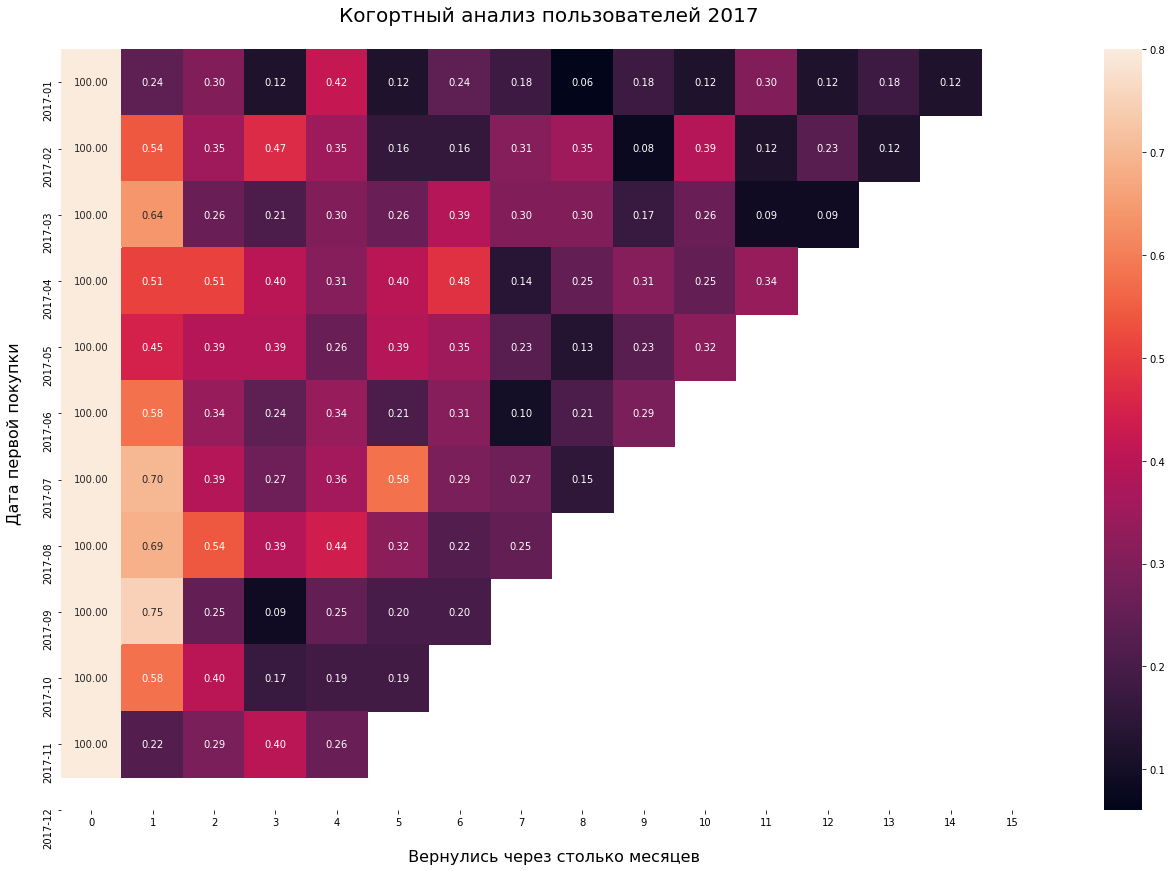

In [ ]:
plt.rcParams['figure.figsize'] = [22, 14]
fontsize_ticks = 14

hmap = sns.heatmap(retention_by_months_passed, \
           vmax=0.8, annot=True, \
           fmt=".2f", \
           yticklabels=['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',\
                        '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'])

plt.ylabel('Дата первой покупки \n',                 size=16)
plt.xlabel('\n Вернулись через столько месяцев',     size=16)
plt.title('Когортный анализ пользователей 2017 \n',  size=20)

### Был проведён когортный анализ пользователей я января по декабрь 2017. Результаты представлены в виде таблицы retention_by_months_passed а также визуализированы с помощью sns.heatmap. Исходя из картинки можно сделать вывод, что пользователи, которые возвращаются, чаще делают следущую покупку в первые 2 месяца,  следующие за первой покупкой.
### Когортой с самым высоким retention на 3й месяц стали пользователи пришедшие в марте 2017 года, для этой когорты retention составляет 0.47%

<!--  -->

## 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию.

In [ ]:
# Для начала, создадим датафрейм со всей необходимой инофрмацией
pre_table = customers_approved_orders.merge(items, on='order_id', how='inner')[['order_id', 'order_purchase_timestamp', 'customer_unique_id', 'price']]

In [ ]:
# Посчитаем стоимость каждого заказа (суммируем цены всех товаров в заказе)
pre_table = pre_table.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id'], as_index=False)\
                     .agg({'price':'sum'})\
                     .query('"2018-01" > order_purchase_timestamp >= "2017-01"')
pre_table.head()

,order_id,order_purchase_timestamp,customer_unique_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.9
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.9
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.9
5,00048cc3ae777c65dbb7d2a0634bc1ea,2017-05-15 21:42:34,85c835d128beae5b4ce8602c491bf385,21.9
6,00054e8431b9d7675808bcb819fb4a32,2017-12-10 11:53:48,635d9ac1680f03288e72ada3a1035803,19.9


Сделаем RFM анализ, как это принято, за период в 1 год. Возьмём 2017 год как в предыдущем задании.В показателе R надо посчитать время от последней покупки до текущей даты. Текущей датой будем считать первый день после окончания рассматриваемого периода, т.е. 01/01/2018.

In [ ]:
from datetime import timedelta

In [ ]:
pre_table['order_purchase_timestamp'].max()

Timestamp('2017-12-31 23:29:31')

In [ ]:
today = pre_table['order_purchase_timestamp'].max() + timedelta(days=1)

In [ ]:
pre_table['Recency'] = pre_table['order_purchase_timestamp'].apply(lambda x: (today - x).days)

In [ ]:
RFM_pre_table = pre_table.groupby('customer_unique_id', as_index=False)\
                          .agg({'Recency':'min', 'order_id':'count', 'price':sum})\
                          .rename(columns={'order_id': 'Frequency', 'price': 'Monetary'})
RFM_pre_table.head()

,customer_unique_id,Recency,Frequency,Monetary
0,0000f46a3911fa3c0805444483337064,297,1,69.00
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90


Теперь разобъём значения каждой категории на 5 групп и присвоим этим группа оценку от 1 до 5, где 1 - наименее выгодная ситуация, а 5 - наиболее.

In [ ]:
# Проверим, будет ли удобно разбить показатели на квантили.
quintiles = RFM_pre_table[['Recency', 'Frequency', 'Monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
quintiles

{'Recency': {0.2: 38.0, 0.4: 92.0, 0.6: 156.0, 0.8: 232.0},
 'Frequency': {0.2: 1.0, 0.4: 1.0, 0.6: 1.0, 0.8: 1.0},
 'Monetary': {0.2: 39.9, 0.4: 68.9, 0.6: 108.56399999999987, 0.8: 179.96}}

Для Recency деление на равные квантили будет адекватным решением, для Monetary тоже, только округлим значения, для Frequency, выберу интервалы исходя из встречающихся значений, чтобы группы получили разную оценку в зависимости от числа покупок.

In [ ]:
RFM_pre_table.Frequency.unique()

array([1, 2, 3, 6, 5, 4, 9])

In [ ]:
quintiles['Frequency'] = {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 5.0}
quintiles['Monetary']  = {0.2: 40, 0.4: 70, 0.6: 110, 0.8: 180}

In [ ]:
quintiles

{'Recency': {0.2: 38.0, 0.4: 92.0, 0.6: 156.0, 0.8: 232.0},
 'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 5.0},
 'Monetary': {0.2: 40, 0.4: 70, 0.6: 110, 0.8: 180}}

Буду вносить оценки в итоговую таблицу с помощью метода pd.cut

In [ ]:
RFM_pre_table['R'] = pd.cut(RFM_pre_table.Recency, \
                                              bins=5, \
                                              labels  = [5, 4, 3, 2, 1])

In [ ]:
RFM_pre_table['F'] = pd.cut(RFM_pre_table.Frequency, \
                                              bins=[0, 1, 2, 3, 5, 9], \
                                              labels  = [1, 2, 3, 4, 5])

In [ ]:
# Прописываю bins основываясь на интервалах
# {0.2: 40, 0.4: 70, 0.6: 110, 0.8: 180}
RFM_pre_table['M'] = pd.cut(RFM_pre_table.Monetary, \
                                               bins=[0, 40, 70, 110, 180, 13500], \
                                               labels  = [1, 2, 3, 4, 5])

In [ ]:
# Меняем тип переменных, потому что функция map  не работает с категориальными
RFM_pre_table['M'] = RFM_pre_table['M'].astype('object')
RFM_pre_table['F'] = RFM_pre_table['F'].astype('object')
RFM_pre_table['R'] = RFM_pre_table['R'].astype('object')

In [ ]:
RFM_pre_table['RFM'] = RFM_pre_table['R'].map(str) + RFM_pre_table['F'].map(str) + RFM_pre_table['M'].map(str)
RFM_table = RFM_pre_table
RFM_table.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,2,112
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,4,1,1,411
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,5,1,4,514
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,3,1,1,311


In [ ]:
# Границы каждого сегмента всегда можно посмотреть в этой таблице
RFM_values =  pd.DataFrame( {'Frequency': ['(0:1]', '(1:2]', '(2:3]', '(3:5]','(5:9]'],
               'Recency':   ['(232:365]', '(156:232]', '(92:156]', '(38:92]',  '(0:38]'],
               'Monetary':  ['(0:40]', '(40:70]', '(70:110]', '(110:180]', '(180:13500]']},
                index   = [1, 2, 3, 4, 5] )
RFM_values.index.name = 'score'
RFM_values

,Frequency,Recency,Monetary
score,,,
1,(0:1],(232:365],(0:40]
2,(1:2],(156:232],(40:70]
3,(2:3],(92:156],(70:110]
4,(3:5],(38:92],(110:180]
5,(5:9],(0:38],(180:13500]


#### Анализ сегментов

In [ ]:
# RFM анализ может выделить до 125 сегментов. У нас получилось 72 комбинации.
RFM_pre_table.RFM.nunique()

72

Для анализа сегменты обычно объединяются в небольшое количество групп (5-12 категорий).
Учитывая специфику данных - большое количество разовых покупок, низкие значения частоты покупок, выделю 8 групп, которые описаны ниже.
    1. 'one-time'        - клиенты сделали одну покупку достаточно давно и не вернулись;
    2. 'at risk'         - эти клиенты сделали несколько покупок, но прошло много времени. Рискуем их потерять.
    3. 'can\'t loose'    - эти клиенты совершали большое количество покупок, но давно не возвращались. Важно их сохранить!
    4. 'need attention'  - клиенты занимающие промежуточное положение
    5. 'loyal'           - лояльные клиенты
    6. 'new'             - новые клиенты
    7. 'promising'       - потенциальные лояльные клиенты
    8. 'VIP'             - самые важные лояльные клиенты с большим количеством покупок

В дальнейшем компания может работать с каждым из сегментов отдельно, например, разослать персональные предложения, предложить скидки, участия в бонусной программе.

In [ ]:
segt_map = {
    r'[1-3]1': 'one-time',
    r'[1-2][2-3]': 'at risk',
    r'[1-2][4-5]': 'can\'t loose',
    r'3[2-3]': 'need attention',
    r'3[4-5]': 'loyal',
    r'[4-5][1-2]': 'new',
    r'[4-5]3': 'promising',
    r'[4-5][4-5]': 'VIP'
}
RFM_table['Segment'] = RFM_table['R'].map(str) + RFM_table['F'].map(str)
RFM_table['Segment'] = RFM_table['Segment'].replace(segt_map, regex=True)
RFM_table.head()

,customer_unique_id,Recency,Frequency,Monetary,R,F,M,RFM,Segment
0,0000f46a3911fa3c0805444483337064,297,1,69.00,1,1,2,112,one-time
1,0000f6ccb0745a6a4b88665a16c9f078,81,1,25.99,4,1,1,411,new
2,0004aac84e0df4da2b147fca70cf8255,48,1,180.00,5,1,4,514,new
3,0005e1862207bf6ccc02e4228effd9a0,302,1,135.00,1,1,4,114,one-time
4,0006fdc98a402fceb4eb0ee528f6a8d4,167,1,13.90,3,1,1,311,one-time


In [ ]:
# ????
# Меняем тип переменных, потому что функция map  не работает с категориальными
RFM_pre_table['M'] = RFM_pre_table['M'].astype('category')
RFM_pre_table['F'] = RFM_pre_table['F'].astype('category')
RFM_pre_table['R'] = RFM_pre_table['R'].astype('category')

In [ ]:
# Оценим объём сегментов
segments_counts = RFM_table['Segment'].value_counts().sort_values(ascending=True).to_frame()
segments_counts

,Segment
loyal,1
can't loose,4
VIP,14
promising,49
at risk,214
need attention,232
one-time,18185
new,24316


Отдельно рассмотрим категории одной покупкой (F=1) и большим числом покупок (F=[2:5]), поскольку эти категории несоизмеримы.

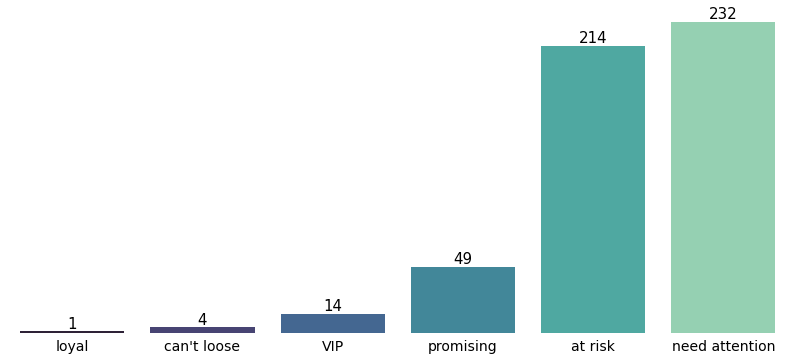

In [ ]:
a = sns.barplot(data=segments_counts, x=segments_counts.index[0:6], y=segments_counts.Segment[0:6],  palette='mako')
for bar in a.patches:
    a.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                        size=15, xytext=(0, 8),
                        textcoords='offset points')
a.set_frame_on(False)
a.tick_params(left=False, labelleft=False, bottom=False)
plt.ylabel('', size=16)
plt.rc('xtick', labelsize= 14 )
plt.rc('ytick', labelsize= 14 )
plt.rcParams['figure.figsize'] = [14, 6]


Результаты анализа сегментов вызывают беспокойство. Крайне мало лояльных клиентов, потенциально лояльных, VIP клиентов. Требуется работа по сохранению пользователей в зоне риска и в переходном сегменте - 'need attention'.

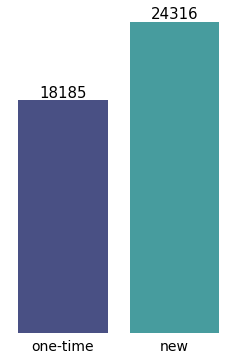

In [ ]:
plt.rcParams['figure.figsize'] = [4, 6]
b = sns.barplot(data=segments_counts, x=segments_counts.index[6:8], y=segments_counts.Segment[6:8],  palette='mako')
for bar in b.patches:
    b.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                        size=15, xytext=(0, 8),
                        textcoords='offset points')
b.set_frame_on(False)
b.tick_params(left=False, labelleft=False, bottom=False)
plt.ylabel('', size=16)
plt.rc('xtick', labelsize= 14 )
plt.rc('ytick', labelsize= 14 )

Большое количество покупателей совершают только одну покупку и не возвращаются. Стоит уделить этому внимание.

#### Анализ групп внутри каждой метрики

In [ ]:
F_scounts = (RFM_table['F'].value_counts().sort_values(ascending=True)).reset_index().rename(columns={'index':'F_score'})
F_scounts

,F_score,F
0,5,2
1,4,17
2,3,76
3,2,1124
4,1,41796


In [ ]:
F_scounts = (RFM_table['F'].value_counts().sort_values(ascending=True)).reset_index().rename(columns={'index':'F_score'})
F_scounts

,F_score,F
0,5,2
1,4,17
2,3,76
3,2,1124
4,1,41796


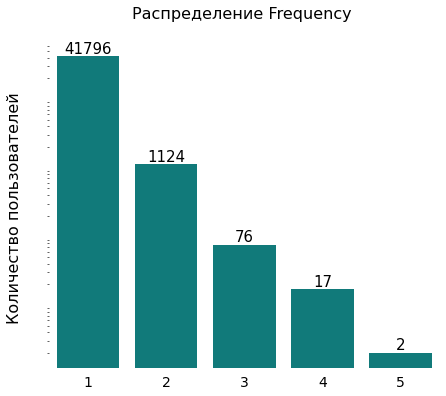

In [ ]:
plt.rcParams['figure.figsize'] = [7, 6]

F_score = sns.barplot(data=F_scounts, x="F_score", y='F', color='darkcyan')
F_score.set_yscale('log')
fontsize_ticks = 14

for bar in F_score.patches:
    F_score.annotate(format(bar.get_height(), '.0f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                        size=15, xytext=(0, 8),
                        textcoords='offset points')

F_score.set_frame_on(False)
F_score.tick_params(left=False, labelleft=False, bottom=False)

plt.ylabel('Количество пользователей \n', size=16)
plt.xlabel('')
F_score.set_title('Распределение Frequency \n', fontsize=16)
plt.rc('xtick', labelsize= 14 )
plt.rc('ytick', labelsize= 14 )

# Распределение построено в логарифмической шкале по оси OY

Подавляющее большинство пользователей совершили только одну покупку. Возможно, дело в специфики продаваемых товаров. А возможно, покупатели остались не довольны качеством товара, сервисом, скоростью доставки и т.п. Для выявления причин было бы хорошо провести дополнительный анализ.

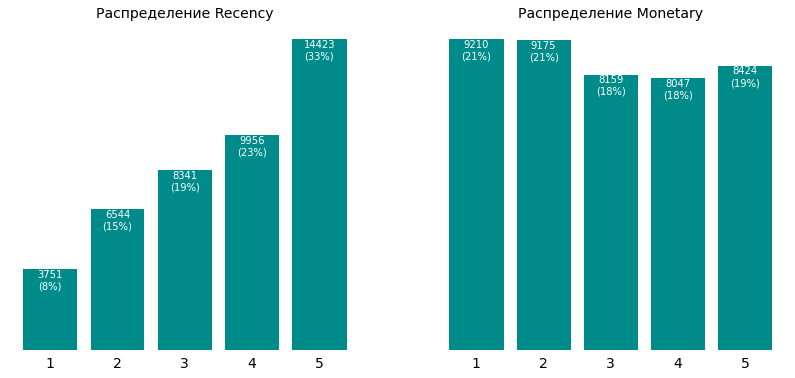

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

for i, p in enumerate(['R', 'M']):
    parameters = {'R':'Recency', 'M':'Monetary'}
    y = RFM_table[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='darkcyan')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Распределение {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('darkcyan')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

В распределении Recency, количество пользователей возрастает от первой к последней категории. Такая динамик может говорить о сезонности покупок, об успешности компании по привлечению клиентов или о наличии тренда на товары анализируемой платформы.
Распределение 'Monetary' линейное.